In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
def clean_cols(df):
    df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('&', 'and').str.replace(',', '_').str.replace('type', 'cost_type').str.replace('+', 'up')
    return df

In [55]:
reviews = pd.read_csv('google_data/googleplaystore.csv')

In [56]:
# get list of genres to create dummy variables
genre_list = []
for i in range(len(reviews['Genres'])):
    for j in range(len(reviews['Genres'][i].split(';'))):
        genre = reviews['Genres'][i].split(';')[j]
        if genre not in genre_list:
            genre_list.append(genre)

In [57]:
# make dummy variables for genre
for i in range(len(genre_list)):
    for j in range(len(reviews['Genres'])):
        if genre_list[i] in reviews['Genres'][j]:
            reviews['genre_' + genre_list[i]] = 1
        else:
            reviews['genre_' + genre_list[i]] = 0

In [58]:
cat = pd.get_dummies(reviews.Category, prefix='cat_')
reviews = reviews.join(cat)

In [59]:
reviews = clean_cols(reviews.drop(['Genres'], axis=1))

In [60]:
# create other summy variables
cost_type = pd.get_dummies(reviews.cost_type, prefix='type_')
reviews = reviews.join(cost_type)

content_rating = pd.get_dummies(reviews.content_rating, prefix='contrat_')
reviews = reviews.join(content_rating)

In [61]:
reviews.head()

,app,category,rating,reviews,size,installs,cost_type,price,content_rating,last_updated,...,cat__video_players,cat__weather,type__Free,type__Paid,contrat__Adults only 18+,contrat__Everyone,contrat__Everyone 10+,contrat__Mature 17+,contrat__Teen,contrat__Unrated
0,X Launcher Prime: With OS Style Theme & No Ads,ART_AND_DESIGN,4.7,149,3.5M,1000+,Paid,$1.99,Everyone,July 30 2018,...,0,0,0,1,0,1,0,0,0,0
1,X Launcher Pro - IOS Style Theme & Control Center,ART_AND_DESIGN,4.8,1216,8.6M,10000+,Paid,$1.99,Everyone,June 26 2018,...,0,0,0,1,0,1,0,0,0,0
2,X Launcher Pro: PhoneX Theme OS11 Control Center,ART_AND_DESIGN,4.7,801,3.5M,5000+,Paid,$1.99,Everyone,July 30 2018,...,0,0,0,1,0,1,0,0,0,0
3,350 Diy Room Decor Ideas,ART_AND_DESIGN,4.5,27,17M,10000+,Free,0,Everyone,November 7 2017,...,0,0,1,0,0,1,0,0,0,0
4,3D Color Pixel by Number - Sandbox Art Coloring,ART_AND_DESIGN,4.4,1518,37M,100000+,Free,0,Everyone,August 3 2018,...,0,0,1,0,0,1,0,0,0,0


In [62]:
drop_cols = ['category', 'current_ver', 'android_ver', 'cost_type', 'content_rating', 'last_updated']
reviews = clean_cols(reviews.drop(drop_cols, axis=1))

In [63]:
clean_cols = ['size', 'installs', 'price']

for col in clean_cols:
    reviews[col] = reviews[col].str.strip('M').str.strip('$').str.strip('+').str.strip(',')

In [64]:
reviews.size = reviews.size.astype(float)
reviews.price = reviews.price.astype(float)
reviews.installs = reviews.installs.astype(int)

In [66]:
reviews.head()

,app,rating,reviews,size,installs,price,genre_art_and_design,genre_creativity,genre_pretend_play,genre_action_and_adventure,...,cat__video_players,cat__weather,cost_type__free,cost_type__paid,contrat__adults_only_18up,contrat__everyone,contrat__everyone_10up,contrat__mature_17up,contrat__teen,contrat__unrated
0,X Launcher Prime: With OS Style Theme & No Ads,4.7,149,1084100.0,1000,1.99,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,X Launcher Pro - IOS Style Theme & Control Center,4.8,1216,1084100.0,10000,1.99,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,X Launcher Pro: PhoneX Theme OS11 Control Center,4.7,801,1084100.0,5000,1.99,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,350 Diy Room Decor Ideas,4.5,27,1084100.0,10000,0.00,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,3D Color Pixel by Number - Sandbox Art Coloring,4.4,1518,1084100.0,100000,0.00,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [67]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 100 columns):
app                                10841 non-null object
rating                             9367 non-null float64
reviews                            10841 non-null int64
size                               10841 non-null float64
installs                           10841 non-null int32
price                              10841 non-null float64
genre_art_and_design               10841 non-null int64
genre_creativity                   10841 non-null int64
genre_pretend_play                 10841 non-null int64
genre_action_and_adventure         10841 non-null int64
genre_auto_and_vehicles            10841 non-null int64
genre_beauty                       10841 non-null int64
genre_books_and_reference          10841 non-null int64
genre_business                     10841 non-null int64
genre_comics                       10841 non-null int64
genre_communication                10841 non

In [69]:
col_list = []
for i in range(len(reviews.columns)):
    col = reviews.columns[i]
    col_list.append(col)

In [72]:
test_cols = []
for col in col_list:
    if 'genre_' not in col and 'cat_' not in col:
        test_cols.append(col)

In [76]:
test_data = reviews[test_cols]
test_data.head()

,app,rating,reviews,size,installs,price,cost_type__free,cost_type__paid,contrat__adults_only_18up,contrat__everyone,contrat__everyone_10up,contrat__mature_17up,contrat__teen,contrat__unrated
0,X Launcher Prime: With OS Style Theme & No Ads,4.7,149,1084100.0,1000,1.99,0,1,0,1,0,0,0,0
1,X Launcher Pro - IOS Style Theme & Control Center,4.8,1216,1084100.0,10000,1.99,0,1,0,1,0,0,0,0
2,X Launcher Pro: PhoneX Theme OS11 Control Center,4.7,801,1084100.0,5000,1.99,0,1,0,1,0,0,0,0
3,350 Diy Room Decor Ideas,4.5,27,1084100.0,10000,0.00,1,0,0,1,0,0,0,0
4,3D Color Pixel by Number - Sandbox Art Coloring,4.4,1518,1084100.0,100000,0.00,1,0,0,1,0,0,0,0


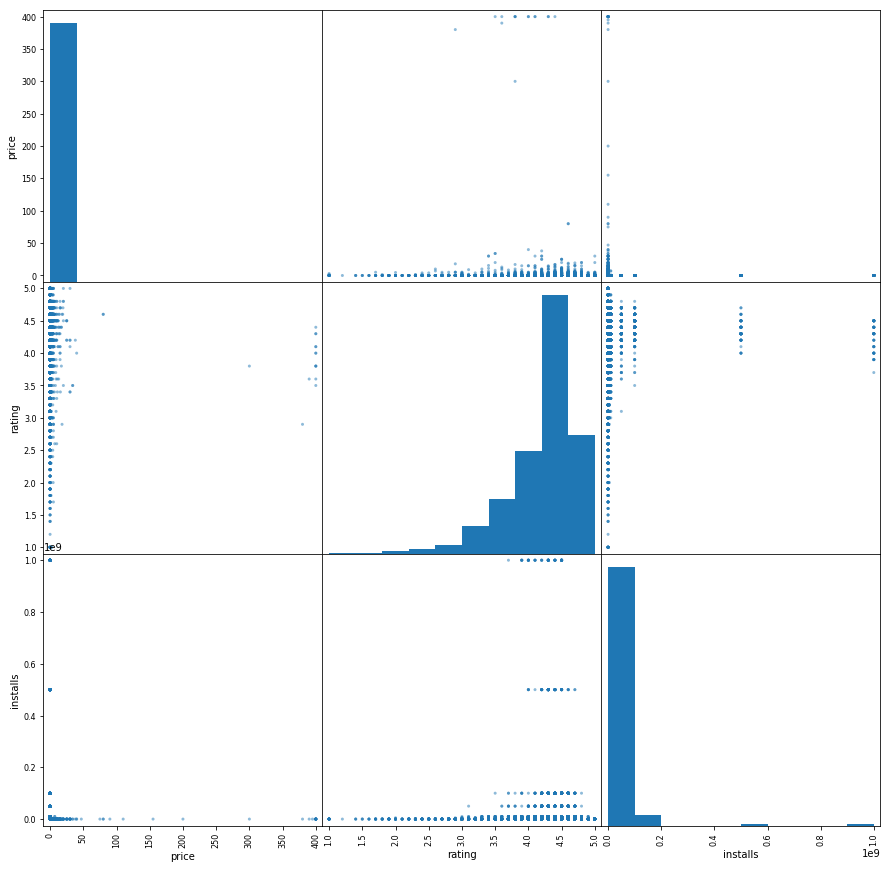

In [80]:
# make scatter matrix
cols = ['price', 'rating', 'installs']
pd.plotting.scatter_matrix(test_data[cols], figsize=(15, 15))
plt.show()